In [222]:
import numpy as np
import pandas as pd
from sklearn.preprocessing import normalize,MinMaxScaler

In [267]:
header = ['userid', 'itemid', 'rating', 'timestamp']
df = pd.read_csv('Data/HugeRating.data', sep='\t', names=header)


In [268]:
df.head(5)

,userid,itemid,rating,timestamp
0,196,242,3,881250949
1,186,302,3,891717742
2,22,377,1,878887116
3,244,51,2,880606923
4,166,346,1,886397596


In [269]:
df.describe()

,userid,itemid,rating,timestamp
count,100000.00000,100000.000000,100000.000000,1.000000e+05
mean,462.48475,425.530130,3.529860,8.835289e+08
std,266.61442,330.798356,1.125674,5.343856e+06
min,1.00000,1.000000,1.000000,8.747247e+08
25%,254.00000,175.000000,3.000000,8.794487e+08
50%,447.00000,322.000000,4.000000,8.828269e+08
75%,682.00000,631.000000,4.000000,8.882600e+08
max,943.00000,1682.000000,5.000000,8.932866e+08


In [266]:
ratings = df['rating'].values.reshape(-1, 1)

min_max_scaler = MinMaxScaler()
df['rating'] = min_max_scaler.fit_transform(ratings)

C:\Users\billis\Anaconda3\Lib\site-packages\sklearn\utils\validation.py:475: DataConversionWarning: Data with input dtype int64 was converted to float64 by MinMaxScaler.
  warnings.warn(msg, DataConversionWarning)


In [246]:
df.head(5)

,userid,itemid,rating,timestamp
0,196,242,0.50,881250949
1,186,302,0.50,891717742
2,22,377,0.00,878887116
3,244,51,0.25,880606923
4,166,346,0.00,886397596


In [270]:
n_users = df.userid.unique().shape[0]
n_items = df.itemid.unique().shape[0]
print ('Number of users = ' + str(n_users) + ' | Number of movies = ' + str(n_items))

Number of users = 943 | Number of movies = 1682


In [271]:
from sklearn import model_selection  as cv
train_data, test_data = cv.train_test_split(df, test_size=0.25)

In [272]:
#Create two user-item matrices, one for training and another for testing
train_data_matrix = np.zeros((n_users, n_items))
for line in train_data.itertuples():
    train_data_matrix[line[1] - 1, line[2] - 1] = line[3]
    
test_data_matrix = np.zeros((n_users, n_items))
for line in test_data.itertuples():
    test_data_matrix[line[1]-1, line[2]-1] = line[3]

In [273]:
#Create two user-item matrices, one for training and another for testing
train_data_matrix = np.zeros((n_users, n_items))
for line in train_data.itertuples():
    train_data_matrix[line[1]-1, line[2]-1] = line[3]
test_data_matrix = np.zeros((n_users, n_items))
for line in test_data.itertuples():
    test_data_matrix[line[1]-1, line[2]-1] = line[3]

In [274]:
train_data_matrix[0]

array([ 5.,  3.,  4., ...,  0.,  0.,  0.])

In [275]:
from sklearn.metrics.pairwise import pairwise_distances
user_similarity = pairwise_distances(train_data_matrix, metric='cosine')
item_similarity = pairwise_distances(train_data_matrix.T, metric='cosine')

In [276]:
def predict(ratings, similarity, type='user'):
    if type == 'user':
        mean_user_rating = ratings.mean(axis=1)
        #You use np.newaxis so that mean_user_rating has same format as ratings
        ratings_diff = (ratings - mean_user_rating[:, np.newaxis])
        pred = mean_user_rating[:, np.newaxis] + similarity.dot(ratings_diff) / np.array([np.abs(similarity).sum(axis=1)]).T
    elif type == 'item':
        pred = ratings.dot(similarity) / np.array([np.abs(similarity).sum(axis=1)])
    return pred

In [277]:
item_prediction = predict(train_data_matrix, item_similarity, type='item')
user_prediction = predict(train_data_matrix, user_similarity, type='user')

In [278]:
from sklearn.metrics import mean_squared_error
from math import sqrt
def rmse(prediction, ground_truth):
    prediction = prediction[ground_truth.nonzero()].flatten()
    ground_truth = ground_truth[ground_truth.nonzero()].flatten()
    return sqrt(mean_squared_error(prediction, ground_truth))

In [279]:
print ('User-based CF RMSE: ' + str(rmse(user_prediction, test_data_matrix)))
print ('Item-based CF RMSE: ' + str(rmse(item_prediction, test_data_matrix)))

User-based CF RMSE: 3.1174236126784463
Item-based CF RMSE: 3.444332671261379


In [280]:
errors = abs(prediction - ground_truth)
print('Mean Absolute Error:', round(np.mean(errors), 2), 'degrees.')

Mean Absolute Error: 0.63 degrees.


In [281]:
from sklearn.metrics import mean_squared_error
from math import sqrt
def flatten(prediction, ground_truth):
    prediction = prediction[ground_truth.nonzero()].flatten()
    ground_truth = ground_truth[ground_truth.nonzero()].flatten()
    return [prediction,ground_truth]

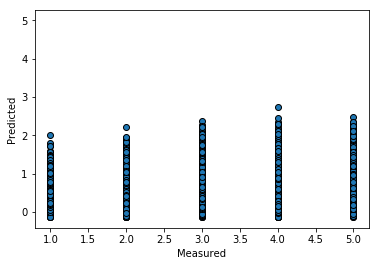

In [282]:
res = flatten(user_prediction,test_data_matrix )

prediction = res[0]
ground_truth = res[1]

fig, ax = plt.subplots()
ax.scatter(ground_truth, prediction, edgecolors=(0, 0, 0))
ax.plot([ground_truth.min(), ground_truth.max()], [ground_truth.min(), ground_truth.max()], linestyle="None" )
ax.set_xlabel('Measured')
ax.set_ylabel('Predicted')
plt.show()

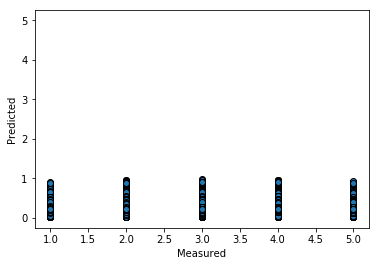

In [283]:
res = flatten(item_prediction,test_data_matrix )

prediction = res[0]
ground_truth = res[1]

fig, ax = plt.subplots()
ax.scatter(ground_truth, prediction, edgecolors=(0, 0, 0))
ax.plot([ground_truth.min(), ground_truth.max()], [ground_truth.min(), ground_truth.max()], linestyle="None" )
ax.set_xlabel('Measured')
ax.set_ylabel('Predicted')
plt.show()
